Downloaded  the train.csv file and saved it to the same location as my  iPython Notebooks.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the Titanic csv file as a DataFrame
titanic = pd.read_csv('train.csv')

# Let's see a preview of the data

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

# We could also get overall info for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
%matplotlib inline

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [ ]:
# Let's first check gender

In [8]:
a=['female','male']

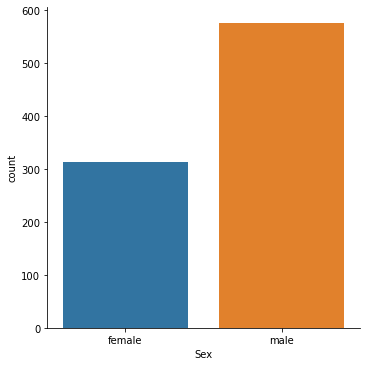

In [9]:
sns.catplot(x='Sex',data=titanic,order=a,kind='count')

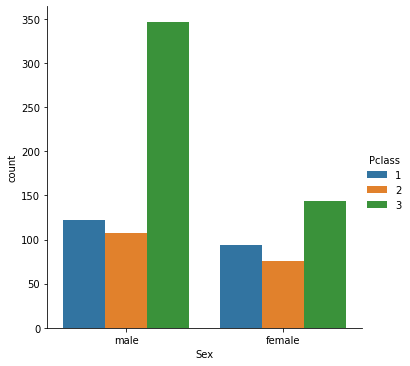

In [10]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!

sns.catplot(x='Sex',data=titanic,kind='count',hue='Pclass')

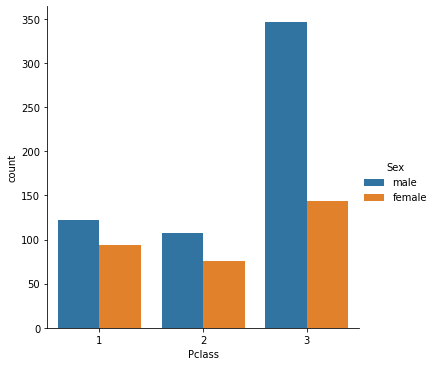

In [11]:
sns.catplot(x='Pclass',data=titanic,kind='count',hue='Sex')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. How can we go about this?

In [12]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 
def male_female_child(passenger):
     # Take the Age and Sex
    age,sex=passenger
    # Compare the age, otherwise leave the sex
    if age<16:
        return 'child'
    else:
        return sex

In [ ]:

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index

In [13]:
titanic['person']=titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [ ]:
# Let's see if this worked, check out the first ten rows

In [14]:
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Excellent! Now we have seperated the passengers between female,male,and child. This will be important later on beacuse of the famous "Women and children first policy"!

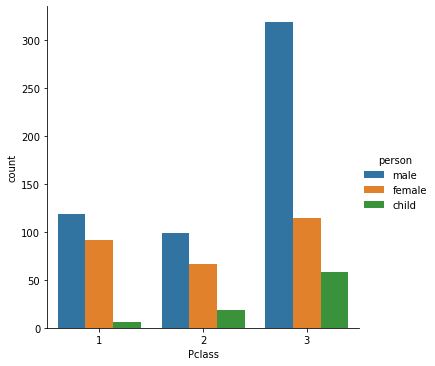

In [15]:
# Let's try the catplot again!

sns.catplot(x='Pclass',data=titanic,kind='count',hue='person')

Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

<AxesSubplot:>

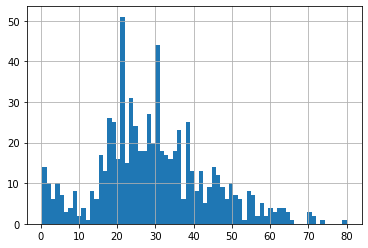

In [16]:
# Quick way to create a histogram using pandas
titanic['Age'].hist(bins=70)

In [17]:
titanic['Age'].mean()

29.69911764705882

In [18]:
# We could also get a quick overall comparison of male,female,child

titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

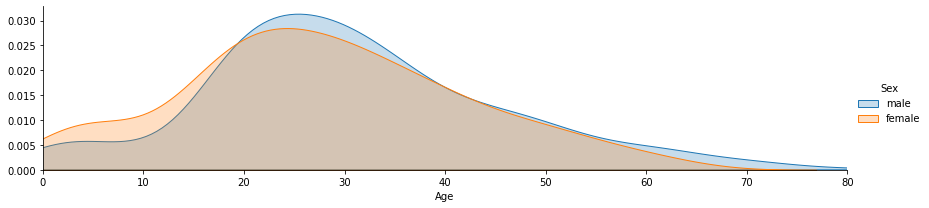

In [19]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.

fig=sns.FacetGrid(titanic,hue='Sex',aspect=4)
# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)
# Set the x max limit by the oldest passenger
oldest=titanic['Age'].max()
#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))
#Finally add a legend
fig.add_legend()

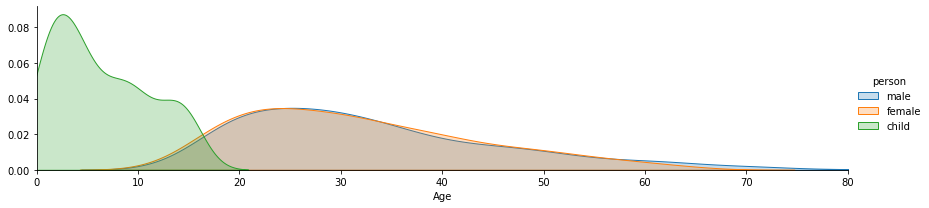

In [20]:
# We could have done the same thing for the 'person' column to include children:


fig=sns.FacetGrid(titanic,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

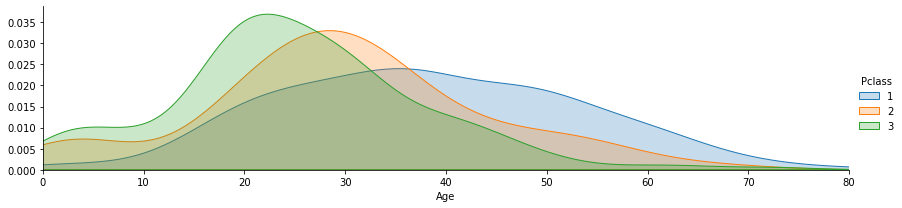

In [21]:
 Let's do the same for class by changing the hue argument:

fig=sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [80]:
# Let's get a quick look at our dataset again

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [22]:
# First we'll drop the NaN values and create a new object, deck

deck=titanic['Cabin'].dropna()

In [23]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

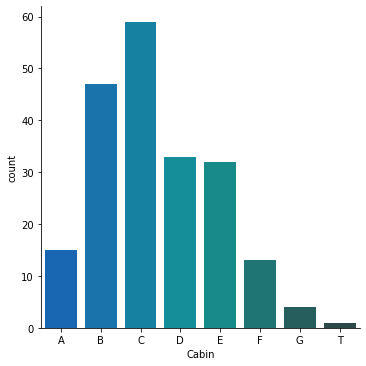

In [24]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list

levels=[]

# Loop to grab first letter
for level in deck:
    levels.append(level[0]) 
    # Reset DataFrame and use cat plot plot

cabin_df = pd.DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.catplot(x='Cabin',data=cabin_df, palette='winter_d',kind='count',order=['A','B','C','D','E','F','G','T'])

# (created cabin_df which takes the 1 0 index value from the cabin )

In [ ]:
# Redefine cabin_df as everything but where the row was equal to 'T'

In [25]:
cabin_df=cabin_df[cabin_df.Cabin!='T']

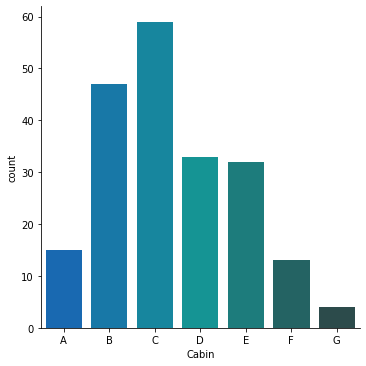

In [26]:
sns.catplot(x='Cabin',data=cabin_df, palette='winter_d',kind='count',order=['A','B','C','D','E','F','G'])

In [27]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

3.) Where did the passengers come from?

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

In [ ]:
# Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values

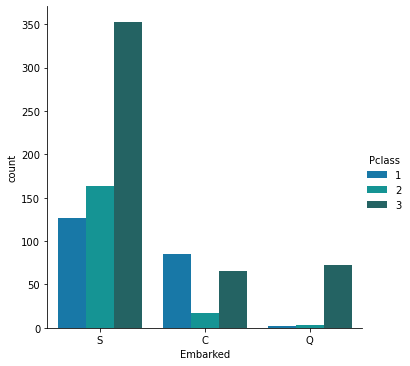

In [29]:
sns.catplot(x='Embarked',data=titanic, palette='winter_d',kind='count',hue='Pclass')

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

4.) Who was alone and who was with family?


In [ ]:
# who was with family and who was alone:

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column

In [31]:
titanic['alone']=titanic.SibSp+titanic.Parch

In [111]:
titanic['alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: alone, Length: 891, dtype: int64

In [112]:
# Look for >0 or ==0 to set alone status

titanic['alone'].loc[titanic['alone']>0]='with family'

C:\Users\samsung\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [115]:
titanic['alone'].loc[titanic['alone']==0]='Alone'

In [116]:
# Let's check to make sure it worked

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


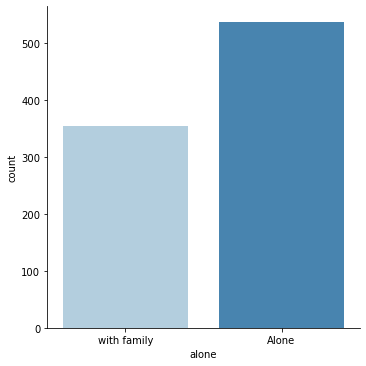

In [123]:
# Now let's get a simple visualization!

sns.catplot(x='alone',data=titanic, palette='Blues',kind='count')

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

In [124]:
# Let's start by creating a new column for legibility purposes through mapping

titanic['survivor']=titanic.Survived.map({0:'no',1:'yes'})


In [125]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


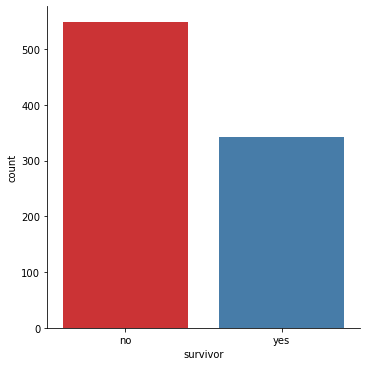

In [126]:
# Let's just get a quick overall view of survied vs died. 

sns.catplot(x='survivor',data=titanic, palette='Set1',kind='count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


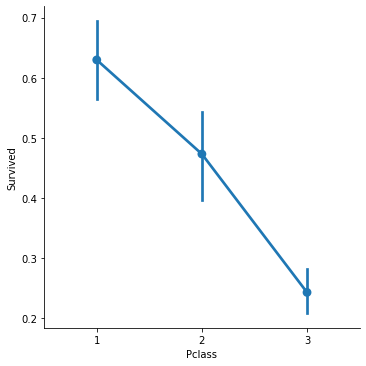

In [33]:
# Let's use a cat plot again, but now considering class

sns.catplot('Pclass','Survived',data=titanic,kind='point')

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


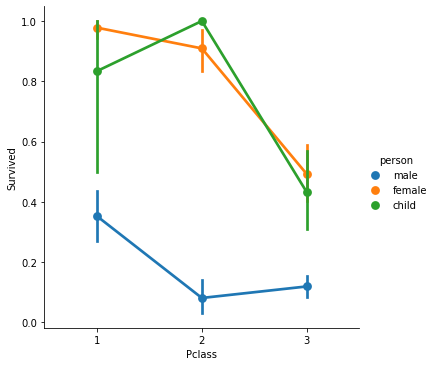

In [34]:
# Let's use a factor plot again, but now considering class and gender

sns.catplot('Pclass','Survived',hue='person',data=titanic,kind='point')

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


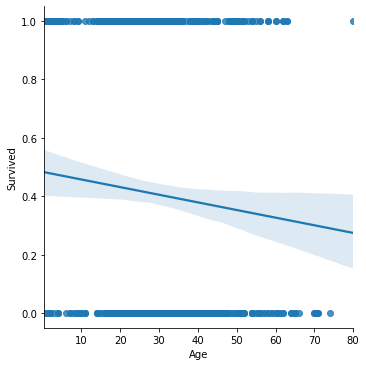

In [35]:
# Let's use a linear plot on age versus survival

sns.lmplot('Age','Survived',data=titanic)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


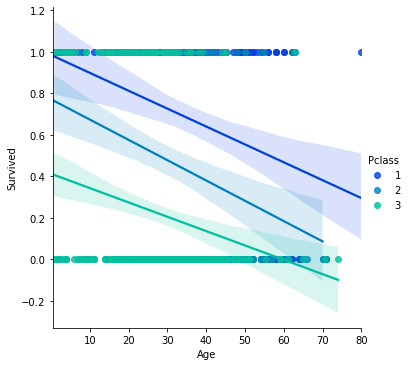

In [37]:
# Let's use a linear plot on age versus survival using hue for class seperation

sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter')

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

In [38]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


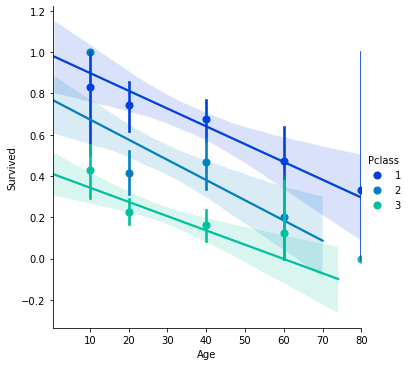

In [41]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter',x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


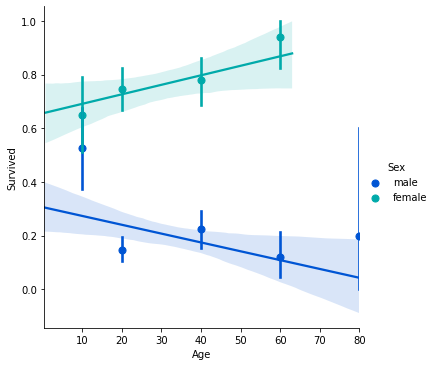

In [40]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic,palette='winter',x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival

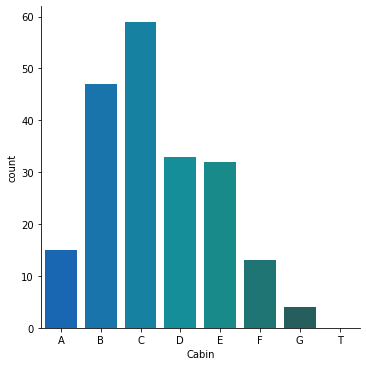

In [42]:
sns.catplot(x='Cabin',data=cabin_df, palette='winter_d',kind='count',order=['A','B','C','D','E','F','G','T'])

In [43]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


SyntaxError: invalid syntax (<ipython-input-49-64768edc8f58>, line 4)

In [50]:
titanic['Cabin'].dropna()

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object